## Processing : Train data

In [1]:
#------------autoreloader
%load_ext autoreload
%autoreload 2

In [2]:
### importing the system path
import sys
sys.path.append('../')

In [3]:
### importing the functions from the src files
from src.basic.load_check_data import load_data, get_nan_duplicates_shape, get_info, drop_cols, save_data
from src.feature_engineering.process_categoricals import get_nunique_value_counts, apply_one_hot, apply_label_encode
from src.feature_engineering.handling_nan import get_nan_location, drop_nan_record
from src.feature_engineering.handling_duplicates import get_duplicates, drop_duplicates
from src.feature_engineering.process_numericals import get_format, check_value_counts_numericals, drop_cols_numerical, split_numericals, change_dtype_numericals
from src.feature_engineering.plot_features import plot_graphs, plot_graphs_post_scaling
from src.feature_engineering.scale_transform import apply_transform_boxcox, drop_pre_post_transformation, scale_train

In [4]:
### setting up the data path
train_path = '../data/basic_processed/train.csv'

In [5]:
### loading the data
train = load_data(train_path)
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
### checking the shape and the nan
get_nan_duplicates_shape(train)

shape : (10683, 11) 
duplicate values : 220 
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


In [7]:
### checking the info
get_info(train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
### checking the duplicates in the dataset
get_duplicates(train)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
33,Jet Airways,15/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,12:35 16 Jun,22h,2 stops,In-flight meal not included,10919
49,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150
73,Jet Airways,24/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 25 Jun,13h 30m,2 stops,No info,12819
81,Jet Airways,24/03/2019,Banglore,New Delhi,BLR → DEL,19:55,22:35,2h 40m,non-stop,No info,7229
87,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,04:25 07 Jun,18h 45m,2 stops,No info,13014
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [9]:
### the above are not the identical duplicates, so we keep them

In [10]:
### dealing with the nan
get_nan_location(train, 'Route')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [11]:
### dropping the record with the nan values, both of nan are in the same record as well
drop_nan_record(train, 9039)
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [12]:
### checking the nan location again
get_nan_location(train, 'Route')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


In [13]:
### checking the train record again
get_nan_duplicates_shape(train)

shape : (10682, 11) 
duplicate values : 220 
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64


In [14]:
### dropping the 'Route' column, as we already have the 'Source', 'Destination' and the 'Total_Stops' columns
drop_cols(train, 'Route')
train.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302


##### =============== Handling the categoricals ===================

In [16]:
### picking up the one hot based cols
one_hot_cols = ['Airline', 'Additional_Info']

In [17]:
### checking their nunique and value counts
get_nunique_value_counts(train, one_hot_cols)

12 
Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64
10 
Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64


In [18]:
### making the 3 categories only for the airlines(keeping top 2)
top_2_airlines = train['Airline'].value_counts()[:2]
train['Airline'] = train['Airline'].apply(lambda x : x if x in top_2_airlines else 'other')

In [19]:
### checking the value counts again for the 'Airline'
get_nunique_value_counts(train, ['Airline'])

3 
Airline
other          4780
Jet Airways    3849
IndiGo         2053
Name: count, dtype: int64


In [20]:
### making only 2 categories for the 'Additional_Info' column
train['Additional_Info'] = train['Additional_Info'].apply(lambda x : x if x == 'No info' else 'some info')

In [21]:
### checking the value counts again for the 'Additional_Info'
get_nunique_value_counts(train, ['Additional_Info'])

2 
Additional_Info
No info      8344
some info    2338
Name: count, dtype: int64


In [22]:
### applying the one hot encoding on both columns together
train = apply_one_hot(train, one_hot_cols)
train.head()

,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Airline_Jet Airways,Airline_other,Additional_Info_some info
0,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,0,0,0
1,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,0,1,0
2,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,1,0,0
3,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,0,0,0
4,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,0,0,0


In [23]:
### label based columns
label_cols = ['Source', 'Destination', 'Total_Stops']

In [24]:
### checking the nunique and value counts in them to decide the labels
get_nunique_value_counts(train, label_cols)

5 
Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64
6 
Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64
5 
Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64


In [25]:
### for the 'Destination', putting the 'New Delhi' and 'Delhi' as the same
train['Destination'] = train['Destination'].apply(lambda x : 'Delhi' if x == 'New Delhi' else x)

In [26]:
### checking the nunique and value_counts for the 'Destination'
get_nunique_value_counts(train, ['Destination'])

5 
Destination
Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: count, dtype: int64


In [27]:
### creating and applying the labels for the 'source'
labels_source = {
'Delhi' : 4,
'Kolkata' : 3,
'Banglore' : 2,
'Mumbai' : 1,
'Chennai' : 0
}
apply_label_encode(train, 'Source', labels = labels_source)
train.head()

,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Airline_Jet Airways,Airline_other,Additional_Info_some info
0,24/03/2019,2,Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,0,0,0
1,1/05/2019,3,Banglore,05:50,13:15,7h 25m,2 stops,7662,0,1,0
2,9/06/2019,4,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,1,0,0
3,12/05/2019,3,Banglore,18:05,23:30,5h 25m,1 stop,6218,0,0,0
4,01/03/2019,2,Delhi,16:50,21:35,4h 45m,1 stop,13302,0,0,0


In [28]:
### creating and applying the labels for the 'destination'
labels_destination = {
'Cochin' : 4,
'Banglore' : 3,
'Delhi' : 2,
'Hyderabad' : 1,
'Kolkata' : 0,
}
apply_label_encode(train, 'Destination', labels = labels_destination)
train.head()

,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Airline_Jet Airways,Airline_other,Additional_Info_some info
0,24/03/2019,2,2,22:20,01:10 22 Mar,2h 50m,non-stop,3897,0,0,0
1,1/05/2019,3,3,05:50,13:15,7h 25m,2 stops,7662,0,1,0
2,9/06/2019,4,4,09:25,04:25 10 Jun,19h,2 stops,13882,1,0,0
3,12/05/2019,3,3,18:05,23:30,5h 25m,1 stop,6218,0,0,0
4,01/03/2019,2,2,16:50,21:35,4h 45m,1 stop,13302,0,0,0


In [29]:
### creating and applying the labels for the 'Total_Stops'
labels_total_stops = {
'non-stop' : 2,
'1 stop' : 1,
'2 stops' : 0,
'3 stops' : 0,
'4 stops' : 0
}
apply_label_encode(train, 'Total_Stops', labels = labels_total_stops)
train.head()

,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Airline_Jet Airways,Airline_other,Additional_Info_some info
0,24/03/2019,2,2,22:20,01:10 22 Mar,2h 50m,2,3897,0,0,0
1,1/05/2019,3,3,05:50,13:15,7h 25m,0,7662,0,1,0
2,9/06/2019,4,4,09:25,04:25 10 Jun,19h,0,13882,1,0,0
3,12/05/2019,3,3,18:05,23:30,5h 25m,1,6218,0,0,0
4,01/03/2019,2,2,16:50,21:35,4h 45m,1,13302,0,0,0


In [30]:
### checking the nunique and value counts in the label based column, post label encoding
get_nunique_value_counts(train, label_cols)

5 
Source
4    4536
3    2871
2    2197
1     697
0     381
Name: count, dtype: int64
5 
Destination
4    4536
3    2871
2    2197
1     697
0     381
Name: count, dtype: int64
3 
Total_Stops
1    5625
2    3491
0    1566
Name: count, dtype: int64


##### =============== Handling the Numericals ===================

In [31]:
### train.head()
train.head()

,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Airline_Jet Airways,Airline_other,Additional_Info_some info
0,24/03/2019,2,2,22:20,01:10 22 Mar,2h 50m,2,3897,0,0,0
1,1/05/2019,3,3,05:50,13:15,7h 25m,0,7662,0,1,0
2,9/06/2019,4,4,09:25,04:25 10 Jun,19h,0,13882,1,0,0
3,12/05/2019,3,3,18:05,23:30,5h 25m,1,6218,0,0,0
4,01/03/2019,2,2,16:50,21:35,4h 45m,1,13302,0,0,0


In [33]:
### for the numerical columns, we will be splitting them, but before that
### we will be looking for any anomaly by just checking the different formats available in the columns

In [32]:
### Date of Jounrey
### defining the patterns for the entries/records in the column
patterns_date_of_journey = {
    "DD-MM-YYYY":          r"^\d{2}-\d{2}-\d{4}$",
    "DD/MM/YYYY":          r"^\d{2}/\d{2}/\d{4}",
    "D/MM/YYYY":          r"^\d{1}/\d{2}/\d{4}"
}

In [33]:
### checking the different format options
get_format(train, 'Date_of_Journey', patterns = patterns_date_of_journey)

Date_of_Journey
10    6512
9     4170
Name: count, dtype: int64
total records : 10682
DD-MM-YYYY : 0
DD/MM/YYYY : 6512
D/MM/YYYY : 4170


In [34]:
### splitting the column
split_numericals(train, 'Date_of_Journey', sep = '/', new_cols = ['day', 'month', 'year'])
train.head()

,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Airline_Jet Airways,Airline_other,Additional_Info_some info,Date_of_Journey_day,Date_of_Journey_month,Date_of_Journey_year
0,2,2,22:20,01:10 22 Mar,2h 50m,2,3897,0,0,0,24,03,2019
1,3,3,05:50,13:15,7h 25m,0,7662,0,1,0,1,05,2019
2,4,4,09:25,04:25 10 Jun,19h,0,13882,1,0,0,9,06,2019
3,3,3,18:05,23:30,5h 25m,1,6218,0,0,0,12,05,2019
4,2,2,16:50,21:35,4h 45m,1,13302,0,0,0,01,03,2019


In [35]:
### checking the value counts in the new one, only 'nunique'
check_value_counts_numericals(train, cols = ['Date_of_Journey_day', 'Date_of_Journey_month', 'Date_of_Journey_year'])

14 
Date_of_Journey_day
9     1304
6     1192
27    1130
21    1111
24    1052
15     984
12     957
1      923
18     832
3      751
01     152
09     102
03      97
06      95
Name: count, dtype: int64
4 
Date_of_Journey_month
05    3465
06    3414
03    2724
04    1079
Name: count, dtype: int64
1 
Date_of_Journey_year
2019    10682
Name: count, dtype: int64


In [36]:
### dropping off the year column and old 'Date_of_Jounrey' column
drop_cols_numerical(train, ['Date_of_Journey_year'])
train.head()

,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Airline_Jet Airways,Airline_other,Additional_Info_some info,Date_of_Journey_day,Date_of_Journey_month
0,2,2,22:20,01:10 22 Mar,2h 50m,2,3897,0,0,0,24,03
1,3,3,05:50,13:15,7h 25m,0,7662,0,1,0,1,05
2,4,4,09:25,04:25 10 Jun,19h,0,13882,1,0,0,9,06
3,3,3,18:05,23:30,5h 25m,1,6218,0,0,0,12,05
4,2,2,16:50,21:35,4h 45m,1,13302,0,0,0,01,03


In [37]:
### 'Dep_Time' column
### defining the patterns for the column
patterns_arrival_dep_time = {
    "HH:MM" : r"^\d{2}:\d{2}$",
    "HH:MM DD MON" : r"^\d{2}:\d{2}\s\d{1,2}\s[A-Za-z]{3}$"
}

In [38]:
### finding the different patterns
get_format(train, 'Dep_Time', patterns = patterns_arrival_dep_time)

Dep_Time
5    10682
Name: count, dtype: int64
total records : 10682
HH:MM : 10682
HH:MM DD MON : 0


In [39]:
### we can begin the split, as it has no different pattern
split_numericals(train, 'Dep_Time', sep = ':', new_cols = ['hour', 'minute'])
train.head()

,Source,Destination,Arrival_Time,Duration,Total_Stops,Price,Airline_Jet Airways,Airline_other,Additional_Info_some info,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute
0,2,2,01:10 22 Mar,2h 50m,2,3897,0,0,0,24,03,22,20
1,3,3,13:15,7h 25m,0,7662,0,1,0,1,05,05,50
2,4,4,04:25 10 Jun,19h,0,13882,1,0,0,9,06,09,25
3,3,3,23:30,5h 25m,1,6218,0,0,0,12,05,18,05
4,2,2,21:35,4h 45m,1,13302,0,0,0,01,03,16,50


In [40]:
### using the same patterns to find odd patterns on the 'Arrival_Time'
get_format(train, 'Arrival_Time', patterns = patterns_arrival_dep_time)

Arrival_Time
5     6348
12    4334
Name: count, dtype: int64
total records : 10682
HH:MM : 6348
HH:MM DD MON : 4334


In [41]:
### making the first split to keep the only necessary part for the 'Arrival_Time' column and
### then we will make the split
train['Arrival_Time'] = train['Arrival_Time'].str.split(' ').str[0]
train.head()

,Source,Destination,Arrival_Time,Duration,Total_Stops,Price,Airline_Jet Airways,Airline_other,Additional_Info_some info,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute
0,2,2,01:10,2h 50m,2,3897,0,0,0,24,03,22,20
1,3,3,13:15,7h 25m,0,7662,0,1,0,1,05,05,50
2,4,4,04:25,19h,0,13882,1,0,0,9,06,09,25
3,3,3,23:30,5h 25m,1,6218,0,0,0,12,05,18,05
4,2,2,21:35,4h 45m,1,13302,0,0,0,01,03,16,50


In [42]:
### checking the patterns again
get_format(train, 'Arrival_Time', patterns = patterns_arrival_dep_time)

Arrival_Time
5    10682
Name: count, dtype: int64
total records : 10682
HH:MM : 10682
HH:MM DD MON : 0


In [43]:
### making the split for the ':' column
split_numericals(train, col = 'Arrival_Time', sep = ':', new_cols = ['hour', 'minute'])
train.head()

,Source,Destination,Duration,Total_Stops,Price,Airline_Jet Airways,Airline_other,Additional_Info_some info,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,2,2,2h 50m,2,3897,0,0,0,24,03,22,20,01,10
1,3,3,7h 25m,0,7662,0,1,0,1,05,05,50,13,15
2,4,4,19h,0,13882,1,0,0,9,06,09,25,04,25
3,3,3,5h 25m,1,6218,0,0,0,12,05,18,05,23,30
4,2,2,4h 45m,1,13302,0,0,0,01,03,16,50,21,35


In [44]:
### defining the patterns for the 'Duration' column
patterns_duration = {
    "DURATION_H_M": r"^\d+h \d+m$",
    "DURATION_H": r"^\d+h$",
    "DURATION_M": r"^\d+m$"
}

In [45]:
### finding the patterns
get_format(train, 'Duration', patterns = patterns_duration)

Duration
6    5503
7    3883
3     516
2     516
5     264
Name: count, dtype: int64
total records : 10682
DURATION_H_M : 9650
DURATION_H : 1031
DURATION_M : 1


In [46]:
### finding out the location for that record where pattern is like 'Duration_M'
train[train['Duration'].str.match(r'^\d+m$')]

,Source,Destination,Duration,Total_Stops,Price,Airline_Jet Airways,Airline_other,Additional_Info_some info,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
6474,1,1,5m,0,17327,0,1,0,6,03,16,50,16,55


In [47]:
### dropping off the record 6474
train.drop(6474, axis = 0, inplace = True)

In [48]:
### checking off the pattern again
get_format(train, 'Duration', patterns = patterns_duration)

Duration
6    5503
7    3883
3     516
2     515
5     264
Name: count, dtype: int64
total records : 10681
DURATION_H_M : 9650
DURATION_H : 1031
DURATION_M : 0


In [49]:
### spliting and only taking the 'hours' part
split_numericals(train, 'Duration', sep = 'h', new_cols = ['hour'])
train.head()

,Source,Destination,Total_Stops,Price,Airline_Jet Airways,Airline_other,Additional_Info_some info,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour
0,2,2,2,3897,0,0,0,24,03,22,20,01,10,2
1,3,3,0,7662,0,1,0,1,05,05,50,13,15,7
2,4,4,0,13882,1,0,0,9,06,09,25,04,25,19
3,3,3,1,6218,0,0,0,12,05,18,05,23,30,5
4,2,2,1,13302,0,0,0,01,03,16,50,21,35,4


In [50]:
### checking the dtype of the columns 
get_info(train)

<class 'pandas.core.frame.DataFrame'>
Index: 10681 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Source                     10681 non-null  int64 
 1   Destination                10681 non-null  int64 
 2   Total_Stops                10681 non-null  int64 
 3   Price                      10681 non-null  int64 
 4   Airline_Jet Airways        10681 non-null  int32 
 5   Airline_other              10681 non-null  int32 
 6   Additional_Info_some info  10681 non-null  int32 
 7   Date_of_Journey_day        10681 non-null  object
 8   Date_of_Journey_month      10681 non-null  object
 9   Dep_Time_hour              10681 non-null  object
 10  Dep_Time_minute            10681 non-null  object
 11  Arrival_Time_hour          10681 non-null  object
 12  Arrival_Time_minute        10681 non-null  object
 13  Duration_hour              10681 non-null  object
dtypes: int32(3)

In [51]:
### changing the dtype of the columns 'object' to 'int64'
cols_for_change_dtype = train.select_dtypes(include = 'object').columns
cols_for_change_dtype

Index(['Date_of_Journey_day', 'Date_of_Journey_month', 'Dep_Time_hour',
       'Dep_Time_minute', 'Arrival_Time_hour', 'Arrival_Time_minute',
       'Duration_hour'],
      dtype='object')

In [52]:
### changing the dtype now
change_dtype_numericals(train, cols_for_change_dtype, target_type = 'int64')

In [53]:
### checking agin the info
get_info(train)

<class 'pandas.core.frame.DataFrame'>
Index: 10681 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Source                     10681 non-null  int64
 1   Destination                10681 non-null  int64
 2   Total_Stops                10681 non-null  int64
 3   Price                      10681 non-null  int64
 4   Airline_Jet Airways        10681 non-null  int32
 5   Airline_other              10681 non-null  int32
 6   Additional_Info_some info  10681 non-null  int32
 7   Date_of_Journey_day        10681 non-null  int64
 8   Date_of_Journey_month      10681 non-null  int64
 9   Dep_Time_hour              10681 non-null  int64
 10  Dep_Time_minute            10681 non-null  int64
 11  Arrival_Time_hour          10681 non-null  int64
 12  Arrival_Time_minute        10681 non-null  int64
 13  Duration_hour              10681 non-null  int64
dtypes: int32(3), int64(11)
memo

##### =============== plotting, scaling and transformation part ================

In [54]:
### plotting the graphs for the features
features_to_plot = train.select_dtypes(include = 'int64').columns
features_to_plot

Index(['Source', 'Destination', 'Total_Stops', 'Price', 'Date_of_Journey_day',
       'Date_of_Journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hour'],
      dtype='object')

feature : Source


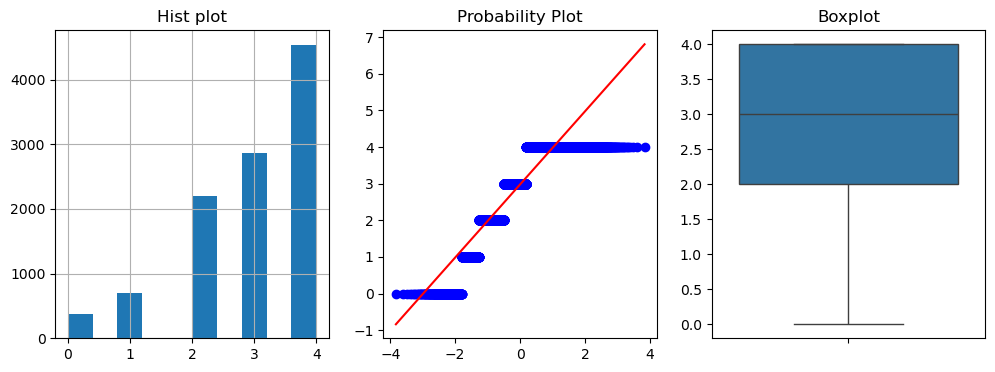

feature : Destination


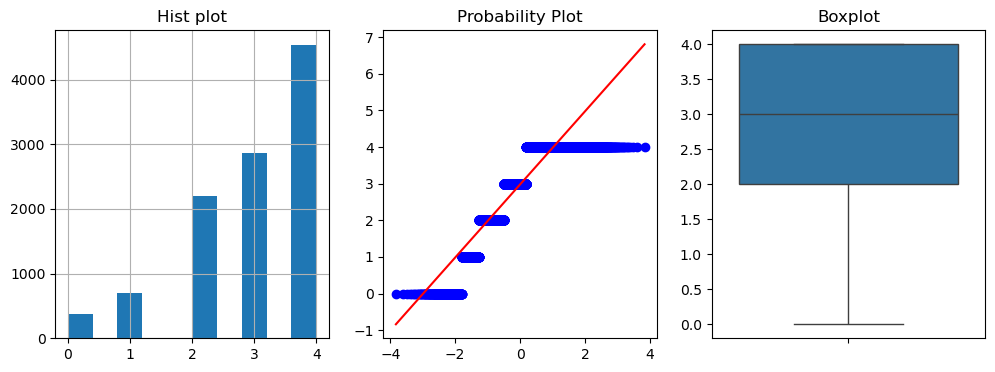

feature : Total_Stops


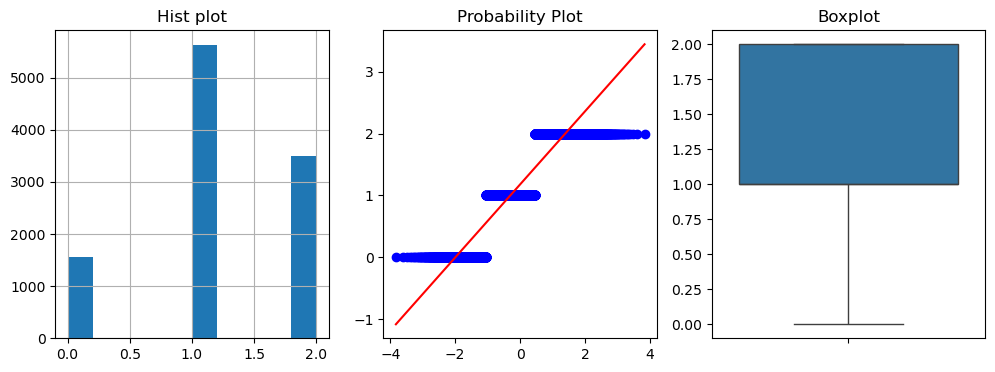

feature : Price


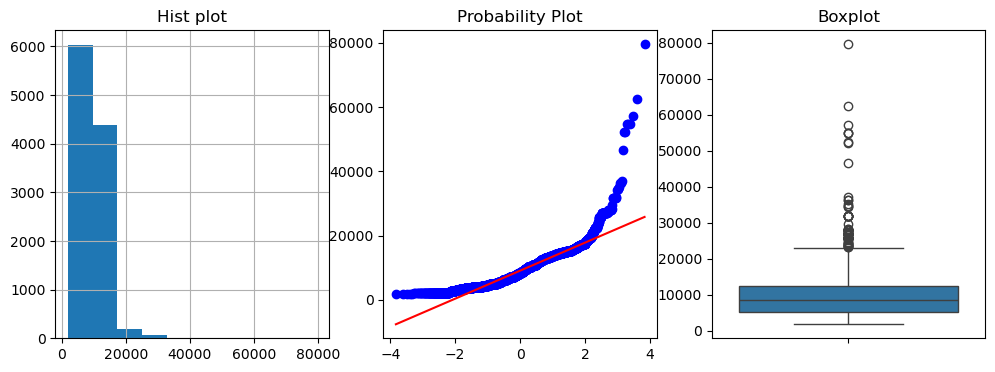

feature : Date_of_Journey_day


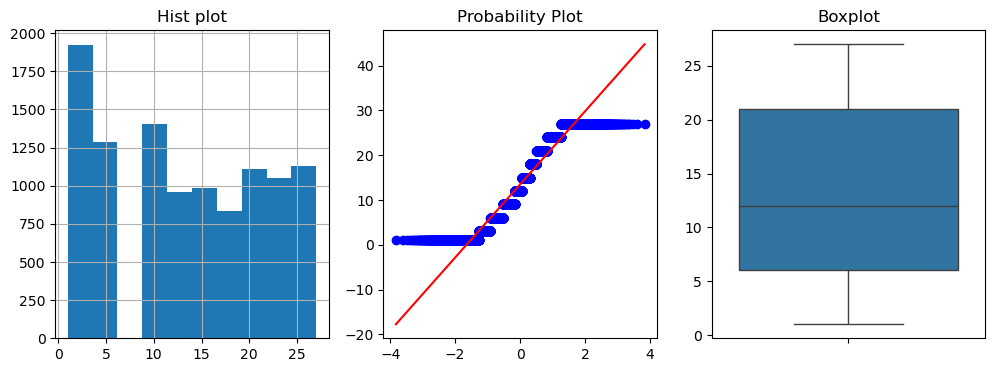

feature : Date_of_Journey_month


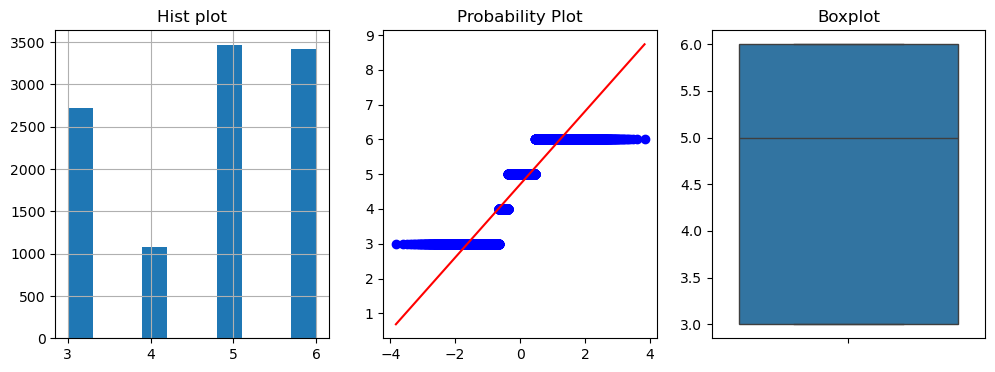

feature : Dep_Time_hour


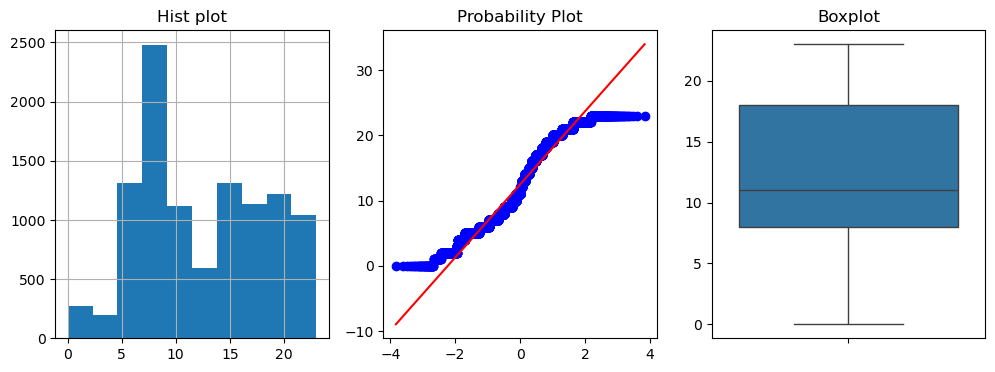

feature : Dep_Time_minute


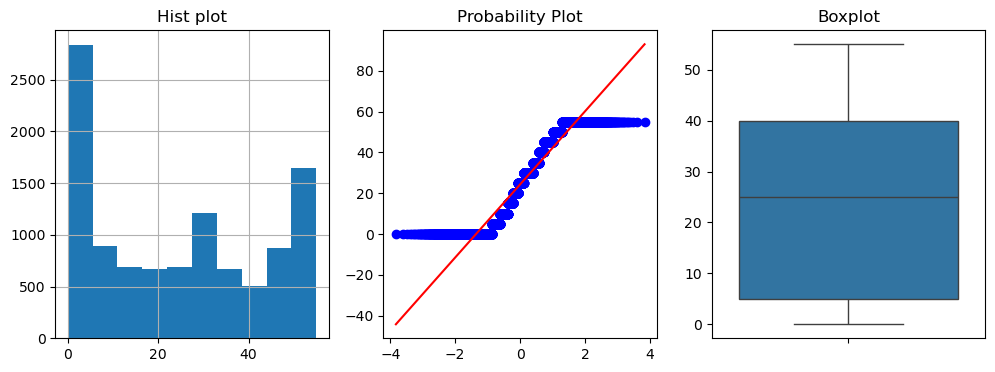

feature : Arrival_Time_hour


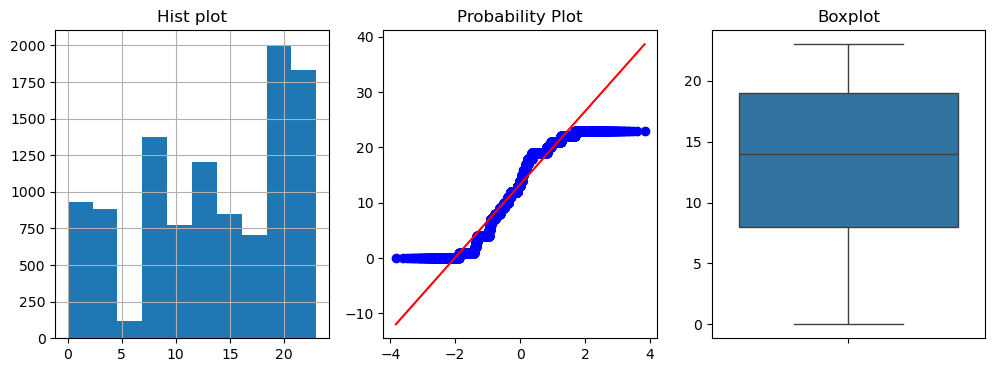

feature : Arrival_Time_minute


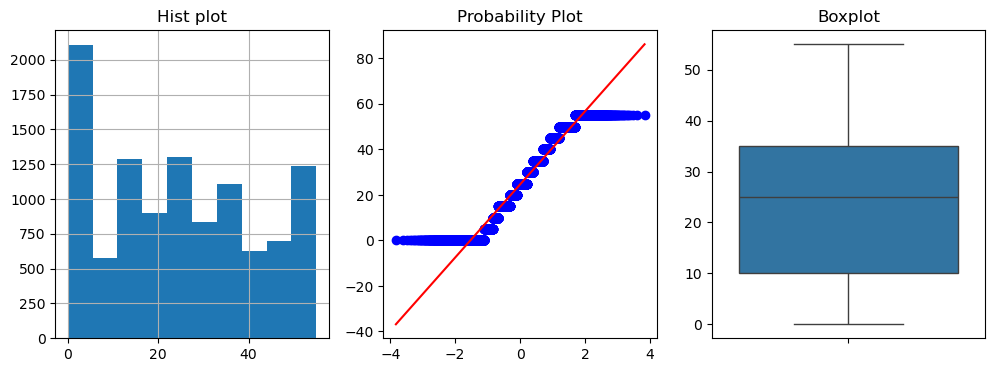

feature : Duration_hour


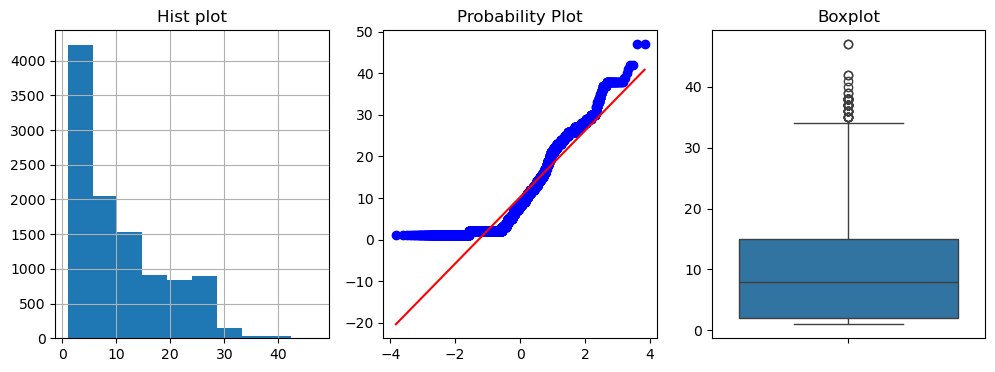

In [55]:
### plotting the features
plot_graphs(train, cols = features_to_plot)

In [56]:
### so, the above data is our 'train_tree' data
### setting up the path and saving the data
train_tree = train.copy()
train_tree_path = '../data/model_ready/train_tree.csv'
save_data(train_tree, train_tree_path)

In [57]:
### loading the data and checking it everything went good
train_tree = load_data(train_tree_path)
train_tree.head()

,Source,Destination,Total_Stops,Price,Airline_Jet Airways,Airline_other,Additional_Info_some info,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour
0,2,2,2,3897,0,0,0,24,3,22,20,1,10,2
1,3,3,0,7662,0,1,0,1,5,5,50,13,15,7
2,4,4,0,13882,1,0,0,9,6,9,25,4,25,19
3,3,3,1,6218,0,0,0,12,5,18,5,23,30,5
4,2,2,1,13302,0,0,0,1,3,16,50,21,35,4


##### =================== working for the distance based models ======================

In [68]:
### for the 'Duration_hour' column, we will be applying the boxcox transformation 
apply_transform_boxcox(train, ['Duration_hour'])
train.head()

,Source,Destination,Total_Stops,Price,Airline_Jet Airways,Airline_other,Additional_Info_some info,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_hour_boxcox
0,2,2,2,3897,0,0,0,24,3,22,20,1,10,2,1.148554
1,3,3,0,7662,0,1,0,1,5,5,50,13,15,7,2.263232
2,4,4,0,13882,1,0,0,9,6,9,25,4,25,19,3.386987
3,3,3,1,6218,0,0,0,12,5,18,5,23,30,5,1.927140
4,2,2,1,13302,0,0,0,1,3,16,50,21,35,4,1.718124


feature : Duration_hour_boxcox


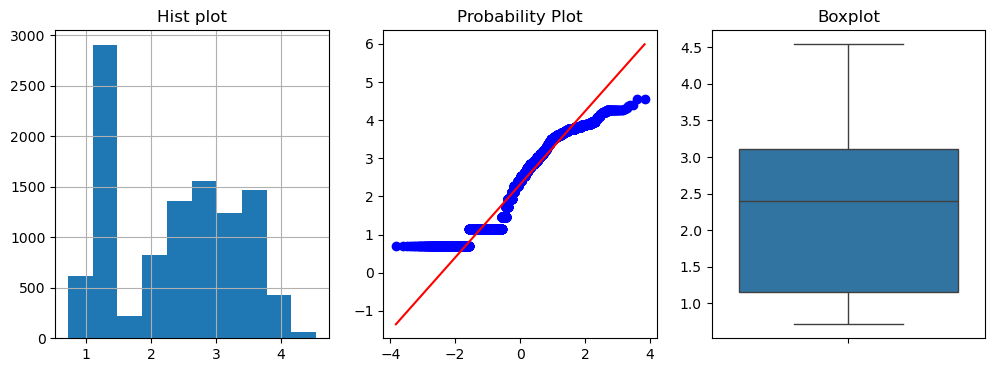

In [69]:
### plotting the graphs again, only for the 'Duration_hour_boxcox' column
plot_graphs(train, ['Duration_hour_boxcox'])

In [70]:
### boxcox transformation worked, renaming it to 'Duration_hour' and dropping off the original 'Duration_hour' column first
drop_pre_post_transformation(train, ['Duration_hour'])
train.head()

,Source,Destination,Total_Stops,Price,Airline_Jet Airways,Airline_other,Additional_Info_some info,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour_boxcox
0,2,2,2,3897,0,0,0,24,3,22,20,1,10,1.148554
1,3,3,0,7662,0,1,0,1,5,5,50,13,15,2.263232
2,4,4,0,13882,1,0,0,9,6,9,25,4,25,3.386987
3,3,3,1,6218,0,0,0,12,5,18,5,23,30,1.927140
4,2,2,1,13302,0,0,0,1,3,16,50,21,35,1.718124


In [71]:
### renaming the 'Duration_hour_boxcox' to 'Duration_hour'
train.rename(columns = {'Duration_hour_boxcox' : 'Duration_hour'}, inplace = True)
train.head()

,Source,Destination,Total_Stops,Price,Airline_Jet Airways,Airline_other,Additional_Info_some info,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour
0,2,2,2,3897,0,0,0,24,3,22,20,1,10,1.148554
1,3,3,0,7662,0,1,0,1,5,5,50,13,15,2.263232
2,4,4,0,13882,1,0,0,9,6,9,25,4,25,3.386987
3,3,3,1,6218,0,0,0,12,5,18,5,23,30,1.927140
4,2,2,1,13302,0,0,0,1,3,16,50,21,35,1.718124


feature : Duration_hour


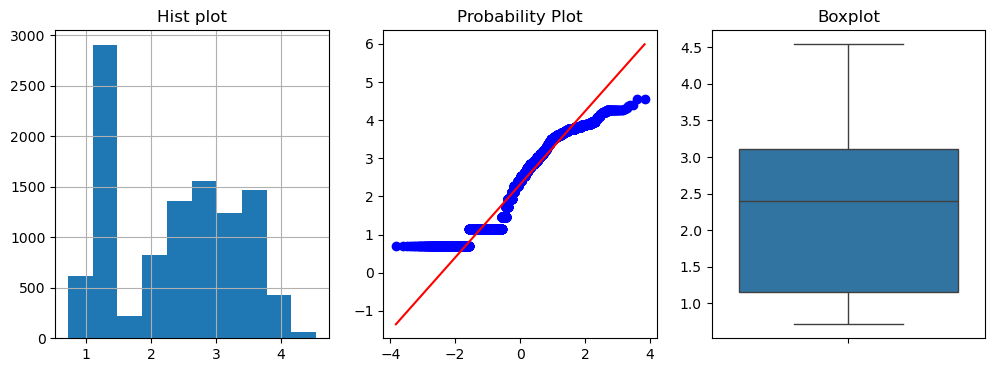

In [72]:
### checking the graph again to be sure
plot_graphs(train, ['Duration_hour'])

In [63]:
### now the data is in good shape and follows the bell curve
### next we are gonna prepare for the scaling the data, maing it ready for the distance based models

In [73]:
### sacling the rest of the columns
cols_to_scale_rest = train.columns.drop([
    'Price','Source', 'Destination', 'Total_Stops', 'Airline_Jet Airways','Airline_other', 'Additional_Info_some info'
    ])
cols_to_scale_rest

Index(['Date_of_Journey_day', 'Date_of_Journey_month', 'Dep_Time_hour',
       'Dep_Time_minute', 'Arrival_Time_hour', 'Arrival_Time_minute',
       'Duration_hour'],
      dtype='object')

In [74]:
### setting up the scaler path and scaling the data
scaler_for_rest_path = '../scalers/scaler_for_rest.pkl'
scale_train(train, cols_to_scale_rest, scaler_path = scaler_for_rest_path)
train.head()

,Source,Destination,Total_Stops,Price,Airline_Jet Airways,Airline_other,Additional_Info_some info,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour
0,2,2,2,3897,0,0,0,0.884615,0.000000,0.956522,0.363636,0.043478,0.181818,0.113831
1,3,3,0,7662,0,1,0,0.000000,0.666667,0.217391,0.909091,0.565217,0.272727,0.405024
2,4,4,0,13882,1,0,0,0.307692,1.000000,0.391304,0.454545,0.173913,0.454545,0.698588
3,3,3,1,6218,0,0,0,0.423077,0.666667,0.782609,0.090909,1.000000,0.545455,0.317225
4,2,2,1,13302,0,0,0,0.000000,0.000000,0.695652,0.909091,0.913043,0.636364,0.262623


In [75]:
### setting up the scaler path and scaling the data
scaler_for_price_path = '../scalers/scaler_for_price.pkl'
scale_train(train,['Price'], scaler_path = scaler_for_price_path)
train.head()

,Source,Destination,Total_Stops,Price,Airline_Jet Airways,Airline_other,Additional_Info_some info,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour
0,2,2,2,0.027497,0,0,0,0.884615,0.000000,0.956522,0.363636,0.043478,0.181818,0.113831
1,3,3,0,0.075920,0,1,0,0.000000,0.666667,0.217391,0.909091,0.565217,0.272727,0.405024
2,4,4,0,0.155917,1,0,0,0.307692,1.000000,0.391304,0.454545,0.173913,0.454545,0.698588
3,3,3,1,0.057348,0,0,0,0.423077,0.666667,0.782609,0.090909,1.000000,0.545455,0.317225
4,2,2,1,0.148457,0,0,0,0.000000,0.000000,0.695652,0.909091,0.913043,0.636364,0.262623


feature : Source


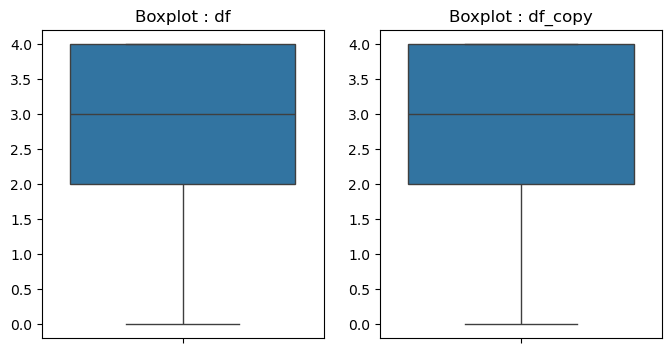

feature : Destination


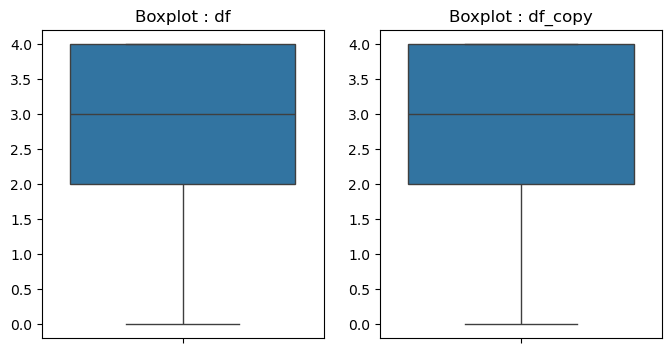

feature : Total_Stops


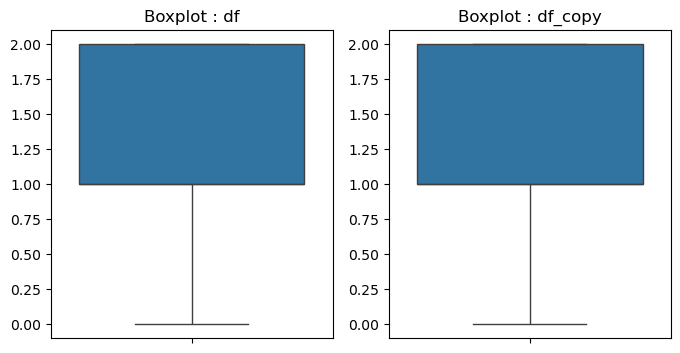

feature : Price


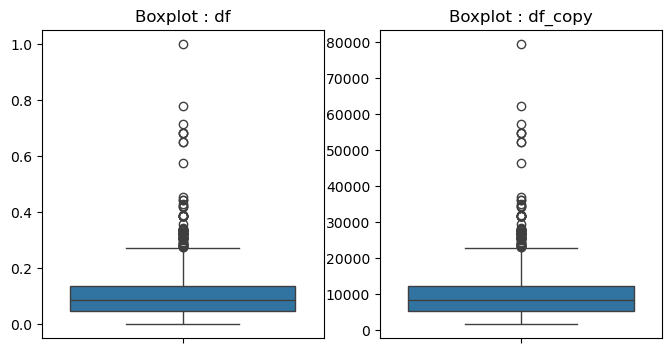

feature : Airline_Jet Airways


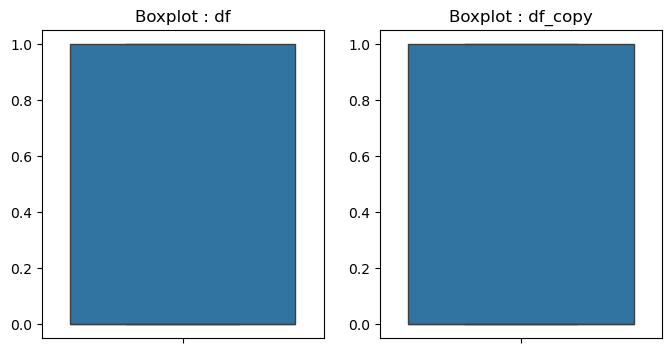

feature : Airline_other


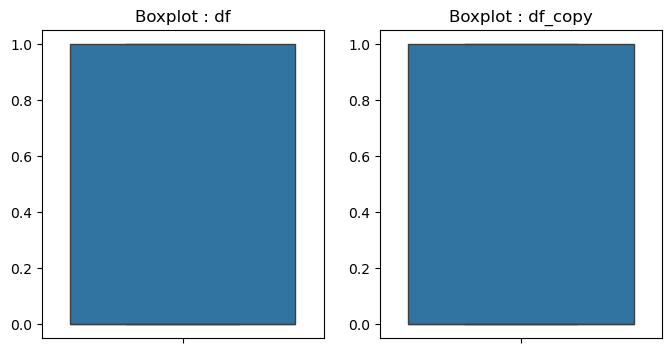

feature : Additional_Info_some info


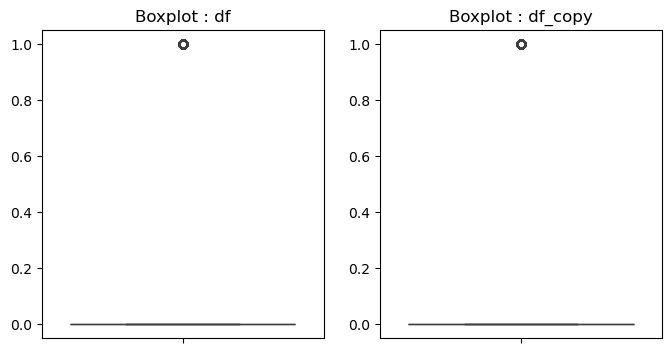

feature : Date_of_Journey_day


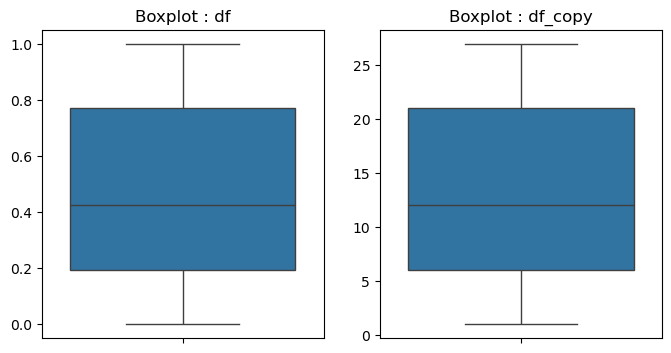

feature : Date_of_Journey_month


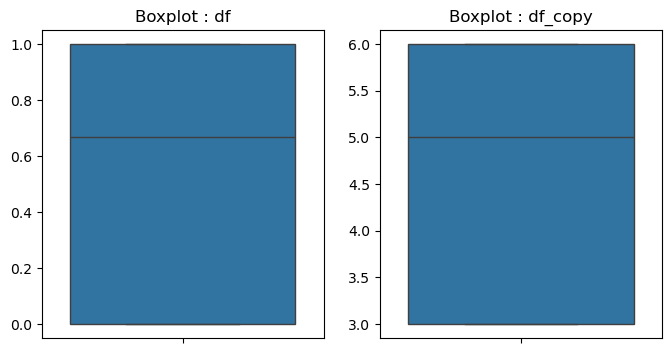

feature : Dep_Time_hour


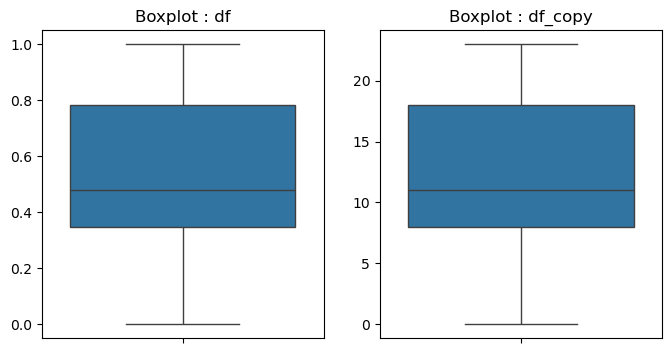

feature : Dep_Time_minute


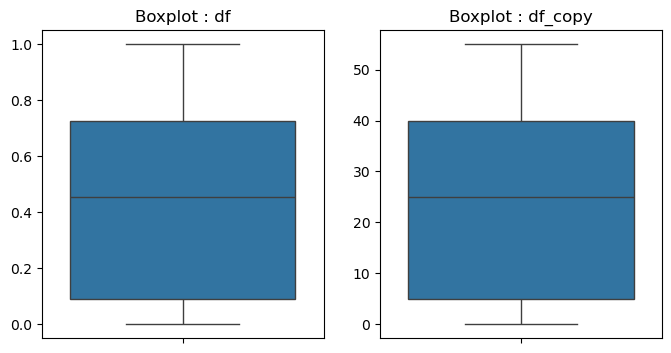

feature : Arrival_Time_hour


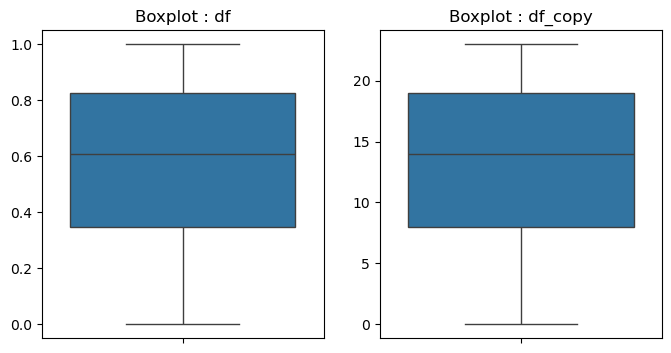

feature : Arrival_Time_minute


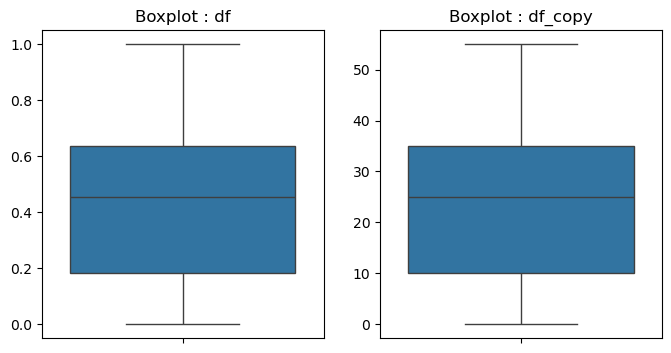

feature : Duration_hour


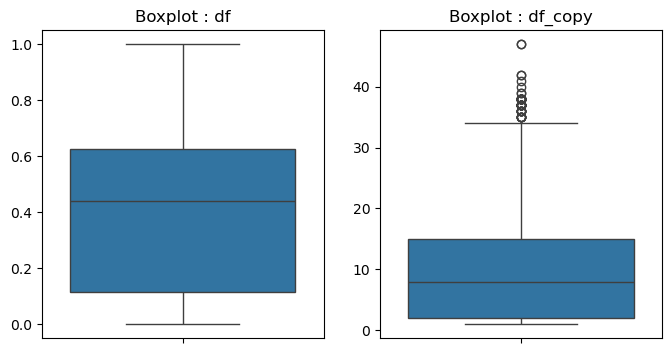

In [79]:
### comparing the data pre, post scaling with respect to the tree data
plot_graphs_post_scaling(train, train_tree, cols = train.columns)

In [80]:
### making the copy and saving the data for the distance based models
train_distance = train.copy()
train_distance_path = '../data/model_ready/train_distance.csv'
save_data(train_distance, train_distance_path)

In [81]:
### loading the data to check if everything went well
train_distance = load_data(train_distance_path)
train_distance.head()

,Source,Destination,Total_Stops,Price,Airline_Jet Airways,Airline_other,Additional_Info_some info,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour
0,2,2,2,0.027497,0,0,0,0.884615,0.000000,0.956522,0.363636,0.043478,0.181818,0.113831
1,3,3,0,0.075920,0,1,0,0.000000,0.666667,0.217391,0.909091,0.565217,0.272727,0.405024
2,4,4,0,0.155917,1,0,0,0.307692,1.000000,0.391304,0.454545,0.173913,0.454545,0.698588
3,3,3,1,0.057348,0,0,0,0.423077,0.666667,0.782609,0.090909,1.000000,0.545455,0.317225
4,2,2,1,0.148457,0,0,0,0.000000,0.000000,0.695652,0.909091,0.913043,0.636364,0.262623
